<b>Ejercicios 1, 2 y 3: </b> Seleccione al menos 3 clasificadores dentro de los disponibles en Scikit. Se recomienda elegir tres de entre los siguientes: árboles de decisión, k vecinos más cercanos, máquinas de vectores soporte y clasificador Naïve de Bayes. No use combinaciones (ensembles) de modelos que serán objeto de una práctica posterior.
<ul>
<li>Para cada uno de los problemas seleccionados realice las siguientes tareas:
<li>Seleccione como método para obtener el error la validación cruzada de 10 particiones o el método hold out.
<li>Ejecute para cada clasificador seleccionado el entrenamiento y anote el error.
<li>Represente gráficamente el error obtenido con cada uno de los métodos de clasificación.
</ul>
*El ejercicio 1 es descargar los datasets

Base de datos: contact-lenses.arff
Porcentaje de bien clasificados KNN:
0.7
Porcentaje de bien clasificados SVM
0.6
Porcentaje de bien clasificados arbol
0.9


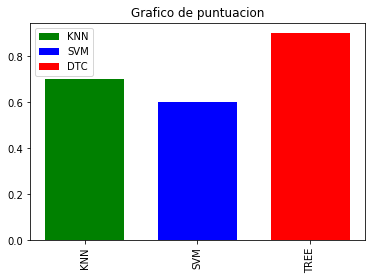

---------------------------
Base de datos: cpu.arff
Porcentaje de bien clasificados KNN:
0.011904761904761904
Porcentaje de bien clasificados SVM
0.0
Porcentaje de bien clasificados arbol
0.023809523809523808


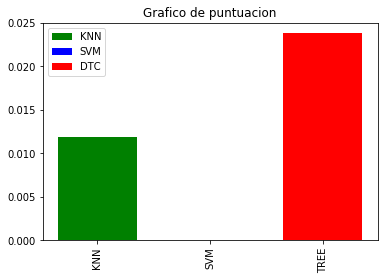

---------------------------
Base de datos: diabetes.arff
Porcentaje de bien clasificados KNN:
0.6785714285714286
Porcentaje de bien clasificados SVM
0.5811688311688312
Porcentaje de bien clasificados arbol
0.6558441558441559


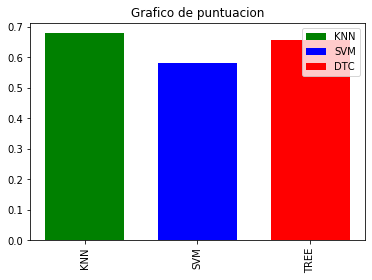

---------------------------
Base de datos: glass.arff
Porcentaje de bien clasificados KNN:
0.6511627906976745
Porcentaje de bien clasificados SVM
0.5
Porcentaje de bien clasificados arbol
0.6511627906976745


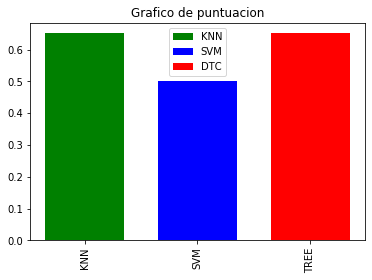

---------------------------
Base de datos: ionosphere.arff
Porcentaje de bien clasificados KNN:
0.8156028368794326
Porcentaje de bien clasificados SVM
0.900709219858156
Porcentaje de bien clasificados arbol
0.8865248226950354


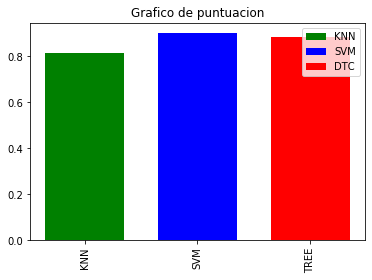

---------------------------
Base de datos: iris.arff
Porcentaje de bien clasificados KNN:
0.9333333333333333
Porcentaje de bien clasificados SVM
0.95
Porcentaje de bien clasificados arbol
0.9333333333333333


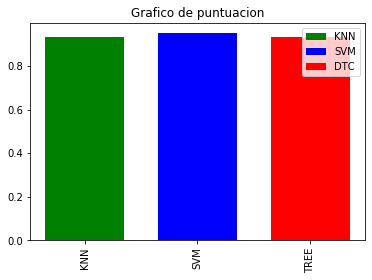

---------------------------
Base de datos: more_iris.arff
Porcentaje de bien clasificados KNN:
0.9166666666666666
Porcentaje de bien clasificados SVM
0.9333333333333333
Porcentaje de bien clasificados arbol
0.9


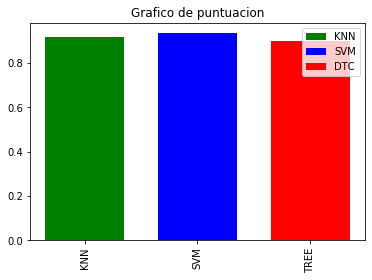

---------------------------
Base de datos: segment-challenge.arff
Porcentaje de bien clasificados KNN:
0.8983333333333333
Porcentaje de bien clasificados SVM
0.44166666666666665
Porcentaje de bien clasificados arbol
0.9416666666666667


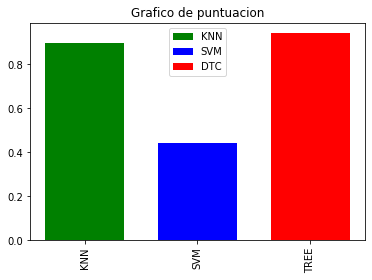

---------------------------
Base de datos: segment-test.arff
Porcentaje de bien clasificados KNN:
0.8734567901234568
Porcentaje de bien clasificados SVM
0.33024691358024694
Porcentaje de bien clasificados arbol
0.9320987654320988


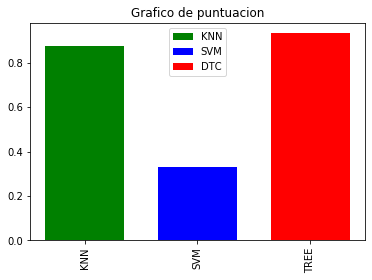

---------------------------
Base de datos: weather.arff
Porcentaje de bien clasificados KNN:
0.5
Porcentaje de bien clasificados SVM
0.5
Porcentaje de bien clasificados arbol
0.3333333333333333


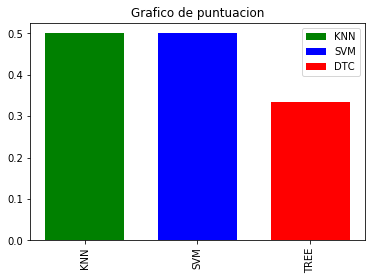

---------------------------


In [4]:
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from scipy.stats import wilcoxon
from os import listdir
from scipy.stats import friedmanchisquare
from scipy.stats import rankdata
from scipy.stats import f
import matplotlib.pyplot as plt

datasets=listdir('./datasets')

for i in datasets:

    print('Base de datos: ' + str(i))
    dataset = arff.loadarff('./datasets/' + str(i))
    df = pd.DataFrame(dataset[0])
    data = df.iloc[:, df.columns != 'class']
    target = pd.factorize(df['class'])[0]
    X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.4)

    # Llamada y entrenamiento del algoritmo KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, Y_train)
    print('Porcentaje de bien clasificados KNN:')
    print(knn.score(X_test, Y_test))
    
    # llamada y entrenamiento algoritmo SVM
    svm = SVC(gamma='auto')
    svm.fit(X_train, Y_train)
    print('Porcentaje de bien clasificados SVM')
    print(svm.score(X_test, Y_test))

    # llamada y entrenamiento del arbol de decision
    arbol = DecisionTreeClassifier()
    arbol = arbol.fit(X_train, Y_train)
    print('Porcentaje de bien clasificados arbol')
    print(arbol.score(X_test, Y_test))
    
    #Representación
    fig = plt.figure(u'Gráfica de barras')  # Figure
    ax = fig.add_subplot(111)  # Axes
    plt.bar('KNN',knn.score(X_test, Y_test) , color='g', width=0.7, align='center')
    plt.bar('SVM', svm.score(X_test, Y_test), color='b', width=0.7, align='center')
    plt.bar('TREE', arbol.score(X_test, Y_test), color='r', width=0.7, align='center')
    plt.xticks(rotation='vertical')
    plt.legend(['KNN', 'SVM', 'DTC'])
    plt.title('Grafico de puntuacion')
    plt.show()
    
    
    print('---------------------------')

<b>Respuesta: </b> Se ha elegido un método de Hold Out que se aplicará con la función train_test_split(), los conjuntos de train y test resultantes se pasarán a los siguientes clasificadores:
<ul>
    <li> KNN.
    <li> SVM.
    <li> Árbol de decisión.
</ul>

Observando las gráficas podemos ver que los clasificadores funcionan bastante bien con algunas excepciones, por ejemplo la base de datos cpu no logra una buena puntuación que las salidas requieren un preprocesamiento prévio, puesto que se deben especificar en rangos. Por otro lado el SVM ofrece en ocasiones malos resultados, esto puede suceder debido a que se ha dejado el parámetro C por defecto, que tiene un valor de 1.0. Este parámetro especifica la permisividad del error y por ese motivo en algunos dataset necesita ser aumentado, ya que además utiliza por defecto un kernel no lineal RBF. Pero también tenemos que tener en cuenta que si este parámetro se aumenta, existe la posibilidad de sobreentrenamiento en otros datasets. Al final, KNN y TREE han dado buenos resultados casi siempre.

<b>Ejercio 4: </b>Use el test de Wilcoxon de comparación de dos algoritmos sobre N problemas y aplíquelo a dos de los algoritmos anteriores. Obtenga el rango de Friedman para cada clasificador y configuración y represente gráficamente los resultados. Aplique el test de Iman-Davenport sobre los tres clasificadores

Test de Wilcoxon para SVM y KNN de todos los datasets
WilcoxonResult(statistic=22.0, pvalue=0.5740657768454861)
Rango de Friedman KNN


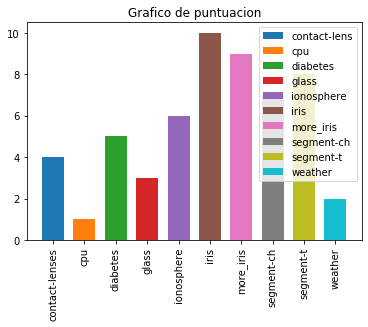

Rango de Friedman SVM


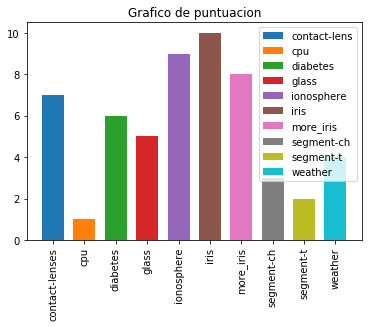

Rango de Friedman TREE


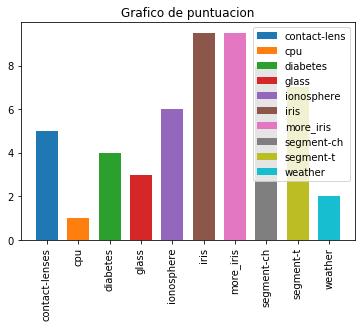

Test de Iman Davenport
No hay diferencias importantes
Valor de F: 0.8230088495575286 , valor de RESULT: 1.9094648686291849
0.8230088495575286


In [6]:
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from scipy.stats import wilcoxon
from os import listdir
from scipy.stats import friedmanchisquare
from scipy.stats import rankdata
from scipy.stats import f



#ejecutar con python2.7

datasets=listdir('./datasets')

scoreWilKNN=[]
scoreWilSVM=[]
scoreWilTREE=[]

for i in datasets:

    dataset = arff.loadarff('./datasets/' + str(i))
    df = pd.DataFrame(dataset[0])
    data = df.iloc[:, df.columns != 'class']
    target = pd.factorize(df['class'])[0]
    X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.4)

    # Llamada y entrenamiento del algoritmo KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, Y_train)
    scoreWilKNN.append(knn.score(X_test, Y_test))

    # llamada y entrenamiento algoritmo SVM
    svm = SVC(gamma='auto')
    svm.fit(X_train, Y_train)
    scoreWilSVM.append(svm.score(X_test, Y_test))

    # llamada y entrenamiento del arbol de decision
    arbol = DecisionTreeClassifier()
    arbol = arbol.fit(X_train, Y_train)
    scoreWilTREE.append(arbol.score(X_test, Y_test))

print('Test de Wilcoxon para SVM y KNN de todos los datasets')
print(wilcoxon(x=scoreWilKNN, y=scoreWilSVM, zero_method='zsplit', correction=False))

print('Rango de Friedman KNN')
ranking=rankdata(scoreWilKNN)
fig = plt.figure(u'Gráfica de barras')  # Figure
ax = fig.add_subplot(111)  # Axes
plt.bar('contact-lenses',ranking[0] , width=0.7, align='center')
plt.bar('cpu', ranking[1],  width=0.7, align='center')
plt.bar('diabetes', ranking[2], width=0.7, align='center')
plt.bar('glass', ranking[3], width=0.7, align='center')
plt.bar('ionosphere', ranking[4], width=0.7, align='center')
plt.bar('iris', ranking[5], width=0.7, align='center')
plt.bar('more_iris', ranking[6], width=0.7, align='center')
plt.bar('segment-ch', ranking[7], width=0.7, align='center')
plt.bar('segment-t', ranking[8], width=0.7, align='center')
plt.bar('weather', ranking[9], width=0.7, align='center')
plt.xticks(rotation='vertical')
plt.legend(['contact-lens', 'cpu', 'diabetes','glass','ionosphere','iris','more_iris','segment-ch','segment-t','weather'])
plt.title('Grafico de puntuacion')
plt.show()

print('Rango de Friedman SVM')
ranking=rankdata(scoreWilSVM)
fig = plt.figure(u'Gráfica de barras')  # Figure
ax = fig.add_subplot(111)  # Axes
plt.bar('contact-lenses',ranking[0] , width=0.7, align='center')
plt.bar('cpu', ranking[1],  width=0.7, align='center')
plt.bar('diabetes', ranking[2], width=0.7, align='center')
plt.bar('glass', ranking[3], width=0.7, align='center')
plt.bar('ionosphere', ranking[4], width=0.7, align='center')
plt.bar('iris', ranking[5], width=0.7, align='center')
plt.bar('more_iris', ranking[6], width=0.7, align='center')
plt.bar('segment-ch', ranking[7], width=0.7, align='center')
plt.bar('segment-t', ranking[8], width=0.7, align='center')
plt.bar('weather', ranking[9], width=0.7, align='center')
plt.xticks(rotation='vertical')
plt.legend(['contact-lens', 'cpu', 'diabetes','glass','ionosphere','iris','more_iris','segment-ch','segment-t','weather'])
plt.title('Grafico de puntuacion')
plt.show()

print('Rango de Friedman TREE')
ranking=rankdata(scoreWilTREE)
fig = plt.figure(u'Gráfica de barras')  # Figure
ax = fig.add_subplot(111)  # Axes
plt.bar('contact-lenses',ranking[0] , width=0.7, align='center')
plt.bar('cpu', ranking[1],  width=0.7, align='center')
plt.bar('diabetes', ranking[2], width=0.7, align='center')
plt.bar('glass', ranking[3], width=0.7, align='center')
plt.bar('ionosphere', ranking[4], width=0.7, align='center')
plt.bar('iris', ranking[5], width=0.7, align='center')
plt.bar('more_iris', ranking[6], width=0.7, align='center')
plt.bar('segment-ch', ranking[7], width=0.7, align='center')
plt.bar('segment-t', ranking[8], width=0.7, align='center')
plt.bar('weather', ranking[9], width=0.7, align='center')
plt.xticks(rotation='vertical')
plt.legend(['contact-lens', 'cpu', 'diabetes','glass','ionosphere','iris','more_iris','segment-ch','segment-t','weather'])
plt.title('Grafico de puntuacion')
plt.show()

print('Test de Iman Davenport')
nDatasets=10
kAlgoritms=3
chi=friedmanchisquare(scoreWilTREE,scoreWilSVM,scoreWilKNN)
F=((nDatasets-1)*chi[0])/(nDatasets*(kAlgoritms-1)-chi[0])
RESULT = f.ppf(q=F, dfn=kAlgoritms-1, dfd=(kAlgoritms-1)*(nDatasets-1))
if F < RESULT:
    print('No hay diferencias importantes')
    print('Valor de F: '+str(F)+' , valor de RESULT: '+str(RESULT))
elif F > RESULT:
    print('Las diferencias son importantes')
    print('Valor de F: '+str(F)+' , valor de RESULT: '+str(RESULT))
print(F)

<b>Respuesta: </b> </br>
El test de Wilcoxon nos dice lo parecidas que son dos muestras, para ello necesita un número concreto de datos (por eso el experimento se realiza con un mínimo de 10 datasets). En este caso se han utilizado los clasificadores KNN y SVM para la realización del experimento, lo que nos como resultado lo normalmente distribuidos que estos están.</br>
El rango de friedman nos dirá lo bien que se comporta cada clasificador con los datasets que tenemos. Lo cual tiende a coincidir con los resultados obtenidos en el ejercicio anterior.</br>
Por último el test de Iman Davenport nos dirá si hay diferencias significativas en los algoritmos utilizados, como se puede ver en la ejecución, no las hay.


<b>Ejercicio 6: </b>
Para uno de los clasificadores elegidos utilice una validación de los hiperparámetros con grid search y compare
su rendimiento con el método con hiperparámetros fijados a priori

In [10]:
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from scipy.stats import wilcoxon
from os import listdir
from scipy.stats import friedmanchisquare
from scipy.stats import rankdata
from scipy.stats import f
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

datasets=listdir('./datasets')

print('EJECUTANDO SVM CON PARAMETROS POR DEFECTO')
for i in datasets:

    print('Base de datos: ' + str(i))
    dataset = arff.loadarff('./datasets/' + str(i))
    df = pd.DataFrame(dataset[0])
    data = df.iloc[:, df.columns != 'class']
    target = pd.factorize(df['class'])[0]
    X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.4)
    
    # llamada y entrenamiento algoritmo SVM
    svm = SVC(gamma='auto')
    svm.fit(X_train, Y_train)
    print('Porcentaje de bien clasificados SVM: ',svm.score(X_test, Y_test))
    
    print('---------------------------')

Cs = np.logspace(-5, 15, num=11, base=2)
Gs = np.logspace(-15, 3, num=9, base=2)
    
print('EJECUTANDO SVM CON PARAMETROS POR GRIDSEARCH')
for i in datasets:

    print('Base de datos: ' + str(i))
    dataset = arff.loadarff('./datasets/' + str(i))
    df = pd.DataFrame(dataset[0])
    data = df.iloc[:, df.columns != 'class']
    target = pd.factorize(df['class'])[0]
    X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.4)
    
    # llamada y entrenamiento algoritmo SVM
    svm_model = SVC()
    optimo = GridSearchCV(estimator=svm_model, param_grid=dict(C=Cs,gamma=Gs),n_jobs=-1,cv=3)
    optimo.fit(X_train, Y_train)
    print('Porcentaje de bien clasificados SVM: ', optimo.score(X_test,Y_test))
    
    
    print('---------------------------')


EJECUTANDO SVM CON PARAMETROS POR DEFECTO
Base de datos: contact-lenses.arff
Porcentaje de bien clasificados SVM:  0.5
---------------------------
Base de datos: cpu.arff
Porcentaje de bien clasificados SVM:  0.011904761904761904
---------------------------
Base de datos: diabetes.arff
Porcentaje de bien clasificados SVM:  0.6558441558441559
---------------------------
Base de datos: glass.arff
Porcentaje de bien clasificados SVM:  0.6162790697674418
---------------------------
Base de datos: ionosphere.arff
Porcentaje de bien clasificados SVM:  0.9078014184397163
---------------------------
Base de datos: iris.arff
Porcentaje de bien clasificados SVM:  0.9333333333333333
---------------------------
Base de datos: more_iris.arff
Porcentaje de bien clasificados SVM:  0.9166666666666666
---------------------------
Base de datos: segment-challenge.arff
Porcentaje de bien clasificados SVM:  0.48333333333333334
---------------------------
Base de datos: segment-test.arff
Porcentaje de bien 

<b>Respuesta: </b>
GridSearch es una función que buscará los parámetros óptimos para un modelo dentro de un rango. Se ha utilizado el clasificador SVM, primero con los parámetros por defecto y despues se ha intentado buscar el valor de C y Gamma, que indican la permisividad del error y el margen del hiperplano respectivamente.
Con el siguiente código se han establecido los rangos de estos valores: </br>
Cs = np.logspace(-5, 15, num=11, base=2)</br>
Gs = np.logspace(-15, 3, num=9, base=2)</br>
Al terminar la ejecución, efectivamente se ha visto un incremento del CCR en la mayoría de los casos. Sin embargo hemos de tener cuidado con este método ya que puede ser que encuentre unos parámetros que conduzcan al sobre-entrenamiento. Además es posible utilizarlo ya que los datasets que se utilizan en estos experimentos son muy pequeños, con un número más grande de datos el tiempo de cómputo sería mucho mayor.